# China Water Quality & Knowledge Thesis

Examining the link between water quality (2017, per prefecture) and a national general social survey (China General Social Survey, 2010) with an environmental module.

How do peoples perception of water quality (importance, status, severity, their knowledge, etc) align with actual water quality?

---

## Load Data

In [90]:
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt

In [91]:
# Returns ALL columns when displaying DataFrame, useful for finding column names
pd.set_option('display.max_columns', None)

### 1. China General Social Survey (2010)

The first dataset is the China General Social Survey (CGSS), an annual national comprehensive survey consisting of demographic data, social indicators, and rotating modules. The year 2010 is used since it is the latest published which includes the environmental module, 20+ questions about quality of the environment, peoples' thoughts on the importance of the environment, the severity of environmental degredation, etc. (more details below).

http://cgss.ruc.edu.cn/index.php?r=index/index&hl=en

In [92]:
# Load cgss2010 Stata file, display the first 5 rows (.head())
cgss = pd.read_stata('../data/cgss2010_12.dta', convert_categoricals=False)
cgss.head()

,id,s41,s42,s43,s44,s45,s5,a1202,a1402,a1502,a1602,a1203,a1403,a1503,a1603,a1204,a1404,a1504,a1604,a1205,a1405,a1505,a1605,a1206,a1406,a1506,a1606,a1207,a1407,a1507,a1607,a1208,a1408,a1508,a1608,a1209,a1409,a1509,a1609,a1210,a1410,a1510,a1610,a1211,a1411,a1511,a1611,a1212,a1412,a1512,a1612,a1213,a1413,a1513,a1613,a1214,a1414,a1514,a1614,a1215,a1415,a1515,a1615,a13201,a13202,a13203,a13204,a13205,a13206,a13207,a13208,a13209,a13210,a13211,a13212,a13213,a13214,a13301,a13302,a13303,a13304,a13305,a13306,a13307,a13308,a13309,a13310,a13311,a13312,a13313,a13401,a13402,a13403,a13404,a13405,a13406,a13407,a13408,a13409,a13410,a13411,a13412,a13501,a13502,a13503,a13504,a13505,a13506,a13507,a13508,a13509,a13510,a13511,a13601,a13602,a13603,a13604,a13605,a13606,a13607,a13608,a13609,a13610,a13701,a13702,a13703,a13704,a13705,a13706,a13707,a13708,a13709,a13801,a13802,a13803,a13804,a13805,a13806,a13807,a13808,a13901,a13902,a13903,a13904,a13905,a13906,a13907,a131001,a131002,a131003,a131004,a131005,a131006,a131101,a131102,a131103,a131104,a131105,a131201,a131202,a131203,a131204,a131301,a131302,a131303,a131401,a131402,a131501,a2,a3a,a3b,a3c,a4,a5,a6,a7a,a7b,a7c,a8a,a8b,a9,a9a,a10,a10a,a11,a121,a122,a123,a124,a125,a126,a127,a128,a13,a14,a15,a16,a17,a18,a19,a20,a21,a23,a24,a25,a281,a282,a283,a284,a285,a286,a29,a3001,a3002,a3003,a3004,a3005,a3006,a3007,a3008,a3009,a3010,a3011,a3012,a311,a312,a313,a32,a33,a34,a35,a36,a371,a372,a373,a38,a39,a40,a41,a421,a422,a423,a424,a425,a43a,a43b,a43c,a43d,a44,a45,a46,a47,a48,a49,a50,a51,a52,a53,a53a,a54,a55,a561,a562,a563,a564,a565,a566,a567,a57,a58,a59a,a59aa,a59b,a59ba,a59c,a59e,a59f,a59fa,a59g,a59h,a59j,a59k,a59m,a60a,a60aa,a60b,a60ba,a60c,a60e,a60f,a60fa,a60g,a60h,a60j,a60k,a60m,a611,a612,a62,a6301,a6302,a6303,a6304,a6305,a6306,a6307,a6308,a6309,a6310,a6311,a64,a65,a66,a671,a672,a673,a674,a675,a676,a677,a678,a679,a681,a682,a69,a70,a71a,a71b,a72,a73,a74,a75,a76,a76a,a77,a78,a79,a80,a81,a82,a82a,a83,a83a,a85,a87,a88,a89a,a89b,a89c,a89d,a89da,a89f,a89g,a89h,a90a,a90b,a90c,a90d,a90da,a90f,a90g,a90h,a91,a92,b111,b121,b131,b141,b151,b112,b122,b132,b142,b152,b113,b123,b133,b143,b153,b114,b124,b134,b144,b154,b21,b22,b23,b24,b3,b4,b5,b6,b7,b8,b9,b1011,b1012,b1021,b1022,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,c1,c201,c202,c203,c204,c205,c206,c207,c208,c209,c210,c211,c212,c213,c214,c215,c216,c301,c302,c303,c304,c305,c306,c307,c308,c309,c310,c4,c5,c6,c7a,c7b,c8a,c8b,c8c1,c8c2,c8c3,c8c4,c8c5,c8c6,c8c7,c8c8,c911,c921,c912,c922,c913,c923,c914,c924,c915,c925,c916,c926,c101,c102,c103,c104,c105,c106,d1a,d1b,d1c,d1d,d1e,d1f,d2a,d2b,d2c,d2d,d2e,d2f,d2g,d2h,d2i,d301,d302,d303,d304,d305,d306,d307,d308,d309,d310,d311,d312,d4a,d4b,d4c,d4d,d5a,d5b,d601,d602,d603,d604,d605,d606,d607,d608,d609,d610,d71,d72,d73,d74,d8,d91,d92,d93,d94,d95,d96,d1001,d1002,d1003,d1004,d1005,d1006,d1007,d1008,d1009,d1010,d1011,d111,d112,d12a,d12aa,d12b,d12c,d12d1,d12d2,d12d3,d12d4,d12d5,d12d6,d12d7,d12d8,d13a,d13b01,d13b02,d13b03,d13b04,d13b05,d13b06,d13b07,d13b08,d13b09,d13b10,d13b11,d13b12,d13b13,d14,d15,d16,d17,d181,d182,d183,d184,d185,d186,d187,d19a,d19b,d19c,d19d,d19e1,d19e2,d19e3,d19e4,d19e5,d19e6,d19e7,d201,d202,d203,d204,d205,d206,d207,d211,d212,d213,d214,d215,d216,d217,d218,d221,d222,d223,d224,d225,d226,d227,l1a,l1b,l2a,l2b,l3a,l3b,l5a,l5b,l6a,l6b,l7a,l7b,l7c,l8a,l8b,l9a,l9b,l9c,l10a,l10b,l10c,l11a,l11b,l11c,l12a,l12b,l12c,l131,l132,l133,l134,l135,l136,l137,l14a,l14b,l14c,l14d,l14e,l14f,l14g,l15a,l15b,l16a,l16b,l16c,l17a,l17b,l18,l19a1,l19a2,l19a3,l19b,l20a,l20b,l20c,l20d,l20e,l20f,l21,l22a,l22b,l22c,l23a,l23b,l2401,l2402,l2403,l2404,l2405,l2406,l2407,l2408,l2409,l2410,l2501,l2502,l2503,l2504,l2505,l2506,l2507,l2508,l2509,l2510,l2511,l2512,l2513,l2514,l2515,msfq2,msfq3,msfq4,msfq6,msfq7,msfq8,msfq9,msfq10,msfq12,ma13,ma14,ma15,ma161,ma162,ma163,ma164,ma165,ma166,mb1,mb2,mb3,mb4,mb5,mc1,mc2a,mc2b,mc3,mc401,mc402,mc403,mc404,mc405,mc406,mc407,mc408,mc409,mc410,md1,me1a,me1b,me1c,mf1a,mf1b,mf1c,mf2a,mf2b,mf2c,mf3a,mf3b,mf3c,mf6,mg1a,mg1b,mg1c,mg21,mg22,mg23

#### *Important Survey Questions' Information below*

###### Important Survey Questions

### General Demographics
s41 - province codes

a2 - gender

a3a - birth year

a3b - birth month

a3c - birth date

a7a - highest current level of education

a8a - personal total income

a15 - subjective physical health

a62 - family total income (2009)

a91 - rural / agricultural household *(1=yes, 2=no)*

a92 - rural / agricultural household *(1=yes, 2=no) (verified by surveyor)*


### Environmental Module (Part L)
l1a - "In your opinion, in terms of the current situation in our country, which of the following issues is the most important?" **(4 = environment)**

l1b - *like l1a, but 2nd most important*

l6a - "In your opinion, in terms of the current situation in our country, which of the following issues is the most important?" *(1 = not at all, 5 = very concerned)*

l6b - How serious are env. problems facing China? *(1 = very, 5 = not at all)*

l7a - Which is most important env. issue in China? **(4 = water pollution)**

l7b - Which has greatest impact on you/family? **(4 = water pollution)**

l8a - Knowledge of causes of environmental problems from ?l7

l8b - Knowledge of solutions of environmental problems from ?l7

l12a - "In order to protect the environment, to what extent are you willing to pay a higher price?" *(1 = very willing, 5 = very reluctant)*

l12b - *like l12a, but with higher taxes*

l12c - like l12a/b, but with willingness to lower living standards

l137 - "Environmental issues directly affect my daily life" *(1 = disagree, 5 = agree)*

l14d - "How do you think the pollution of rivers, rivers and lakes in China is harmful to the environment?" *(1 = extremely, 5 = not at all)*

l15a/b - *see question, about statements of responsibility for environmental protection (individuals/companies, government, etc.)*

l16c - "In terms of solving environmental problems in your area, how do you think the local government has done in the past five years?" *(1 = ignored, 5 = successful)*

l20e - "Do you often save water or reuse water specifically for environmental protection?" *(1 = always, 4 = never)*

l2409 - "In the domestic water pollution report, the water quality of Category V (5) is better than that of Category I (1)" *(1 = correct, 2 = incorrect, 8 = cannot choose)*


In [93]:
columns = ['s41','a2','a3a','a3b','a3c','a7a','a8a','a15','a62','a91','a92','l1a','l1b','l6a','l7a','l7b','l8a','l8b','l12a','l12b','l12c','l137','l14d','l15a','l15b','l16c','l20e','l2409']

A very short set of columns (for quick analysis from a friend)

In [94]:
columns_strict = ['s41','l14d','l2409']

Only include the strict set of 3 columns

The survey uses geographic identifiers in columns s41 (and I think s42-44). However, only province level information is released, due to privacy concerns (see [this link](http://cgss.ruc.edu.cn/index.php?r=index/artabout&aid=18)). They are listed below, in a dictionary (Chinese)

In [96]:
s41_codes = {
    1: '上海市',
    2: '云南省',
    3: '内蒙古自治区',
    4: '北京市',
    5: '吉林省',
    6: '四川省',
    7: '天津市',
    8: '宁夏回族自治区',
    9: '安徽省',
    10: '山东省',
    11: '山西省',
    12: '广东省',
    13: '广西壮族自治区',
    14: '新疆维吾尔自治区',
    15: '江苏省',
    16: '江西省',
    17: '河北省',
    18: '河南省',
    19: '浙江省',
    20: '海南省',
    21: '湖北省',
    22: '湖南省',
    23: '甘肃省',
    24: '福建省',
    25: '西藏自治区',
    26: '贵州省',
    27: '辽宁省',
    28: '重庆市',
    29: '陕西省',
    30: '青海省',
    31: '黑龙江省'}

The list is then put into a df, called `s41`. *Note: The `orient` field refers to the data being horizontal or vertical, and the `columns` field adds column names. The `.index.name` adds a title to the index column.*

In [97]:
s41 = pd.DataFrame.from_dict(s41_codes, orient='index',columns=['Province'])
s41.index.name = 'S41'
s41

,Province
S41,
1,上海市
2,云南省
3,内蒙古自治区
4,北京市
5,吉林省
6,四川省
7,天津市
8,宁夏回族自治区
9,安徽省


### 2. 2018 Blue City Water Quality Index Ranking

The second dataset is the water quality of every prefecture (sub-province) from a 2018 publication (using 2017 measurements). **Add more details**

https://wwwoa.ipe.org.cn//Upload/201909201147459274.pdf (en)

In [98]:
wqir = pd.read_csv('../data/wqir2018_zh.csv', sep=' ')
wqir_sort = wqir.sort_values(by=['Province'])

In [99]:
province = wqir['Province']
score = wqir['Score']
city = wqir['City']
category = wqir['Level']

---

## Data Exploration

### CGSS2010

#### Heatmap Function

The following function asks the user to imput a column title (question code). Any column name can be entered, but for interesting results, choose one from the above list of important survey questions.

Once the column name is entered, the function displays a visual heatmap of the response types by decimal (total = 1.0) on the x axis, sorted by province on the y axis.

Enter `heatmap()` to execute this function.

In [100]:
def heatmap():
        user_column = input('Enter a column code: ')
        user = cgss[df_cgss[user_column] >= 1]
        # Group by provence, count people in each province, then sort them by asceding order.
        user_grouped = (user.groupby(['s41', user_column])
            .size()
            .unstack(fill_value=0)
            .sort_index(axis=1, ascending=True)
            )
        user_grouped_percent=user_grouped.div(user.groupby(['s41']).size(), axis=0)
        user_grouped_percent=user_grouped_percent.round(1)
        fig, ax = plt.subplots()
        sns.set_theme(
            style="white",
            font='dengxian',
            font_scale=.30,
            )
        sns.heatmap(
            user_grouped_percent,
            vmin=0,
            vmax=1,
            yticklabels=1,
            annot=True,
            cmap='viridis',
            square=True,
            cbar=False,
            )
        ax.set_title(user_column)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=0, ha="center", rotation_mode="anchor")
        fig.tight_layout()

#### Count Function

The following function does the same initial steps as the `heatmap` function, but without normalizing by the number of responses per province (it only sums the responses by type and by province).

Enter `count()` to execute this function.

In [101]:
def count():
    user_column = input('Enter a column code: ')
    user = cgss[cgss[user_column] >= 1]
    user_grouped = (user.groupby(['s41', user_column])
        .size()
        .unstack(fill_value=0)
        .sort_index(axis=1, ascending=True)
        )
    print(user_grouped)

#### Percent Function

The following function is the same as the `count` function, but also normalizes per province to make quanities comparable. It's essentially the `heatmap` function without the visualization.

Enter `percent()` to execute this function.

In [172]:
def percent():
    user_column = input('Enter a column code: ')
    user = cgss[cgss[user_column] >= 1]
    user_grouped = (user.groupby(['s41', user_column])
        .size()
        .unstack(fill_value=0)
        .sort_index(axis=1, ascending=True)
        )
    user_grouped_percent=user_grouped.div(user.groupby(['s41']).size(), axis=0)
    user_grouped_percent=user_grouped_percent
    user_grouped_percent=user_grouped_percent
    print(user_grouped_percent)

#### Individual Question Countplot

The following function visualizes number of responses (total, not per province) for each response type of an entered column (question code).

Enter `countplot()` to execute this function.

In [103]:
def countplot():
    user_column = input('Enter a column code: ')
    sns.countplot(
        data=cgss,
        x=cgss[user_column],
        )

---

### 2018 Blue City Water Quality Index Ranking Visualization (WQIR2018)

The following shows statististical information for the WQIR2018 dataset. Let's see the data, loaded above. As evident, the `Province`, `City`, `Score`, `Rank`, and the `Level` for the water quality level.

In [104]:
wqir.head()

,Rank,Province,City,Score,Level
0,1,青海,海南州,4.04,优
1,2,四川,甘孜,4.11,优
2,3,四川,阿坝,4.42,优
3,4,青海,海北,4.58,优
4,5,青海,果洛,4.73,优


On page 5 of the report [here](https://wwwoa.ipe.org.cn//Upload/201909201147459274.pdf) (mentioned above), the following are the score/level to water quality classes (outlined [here](http://english.mee.gov.cn/SOE/soechina1997/water/standard.htm)):

| IPE Score     | IPE Level (EN)          | IPE Level (ZH) | EQ  Water |
|:-------------:|:-----------------------:|:--------------:|:---------:|
| 0.00 - 4.79   | Excellent               | 优             | II     |
| 4.79 - 10.28  | Good                    | 良             |III    |
| 10.28 - 16.85 | Moderate                | 一般           | IV     |
| 16.85 - 24.74 | Relatively Poor         | 较差           | V       |
| 24.70 - 50.00 | Poor                    | 差             | V      |

*Note: The EQ equivalents above refer "The total score (equivalent to the local water
quality average) met or surpassed the requirements of Class `X` (II-V) water quality..."*

First, only two columns are looked at (`Province` and `Score`), then the scores are grouped by `Province` for statistical analysis, using `.groupby(['Province'])`. Finally, the resultes are described with `.describe()`

In [105]:
wqir_score = wqir[['Province','Score']]
wqir_grouped = wqir_score.groupby(['Province'])
wqir_grouped.describe()

Score                                                             
         count       mean       std    min      25%     50%      75%    max
Province                                                                   
上海         1.0  21.400000       NaN  21.40  21.4000  21.400  21.4000  21.40
云南        16.0  11.520625  5.061612   7.51   8.0950   8.870  12.7800  21.43
内蒙古       12.0  21.080833  9.965850  10.52  15.1225  17.315  25.7525  40.81
北京         1.0  18.600000       NaN  18.60  18.6000  18.600  18.6000  18.60
吉林         9.0  19.920000  8.766479  10.95  13.6000  16.260  24.7400  34.59
四川        21.0  10.035714  4.430558   4.11   7.2000   8.780  12.7100  21.63
天津         1.0  23.630000       NaN  23.63  23.6300  23.630  23.6300  23.63
宁夏         5.0  17.930000  6.721893  10.80  15.1900  16.530  18.2300  28.90
安徽        16.0  16.977500  5.069436  10.19  12.3275  16.780  20.4075  25.71
山东        17.0  21.858824  6.244904  12.97  15.2700  22.280  27.0300  32.91
山西        11.0  23.310000  7.832850  12.57  20.3250  23.120  26.2700  41.92
广东        21.0  18.218095  8.713758   7.23  12.0100  18.850  23.1200  39.42
广西        14.0  13.372143  2.900162   9.97  10.9900  12.695  15.2725  18.82
新疆        18.0  11.363889  4.633684   5.62   7.6550  10.730  12.5675  23.10
江苏        13.0  18.369231  4.246709  11.51  14.8100  18.880  21.1300  24.85
江西        11.0  10.948182  2.799678   7.29   9.5500  10.180  11.4700  16.45
河北        11.0  23.132727  8.231019  12.36  17.8900  21.480  28.7850  38.54
河南        18.0  16.965556  3.172400  11.99  14.9800  16.915  18.4925  24.34
浙江        11.0  12.918182  4.294429   7.28   9.0150  12.890  16.0600  19.09
海南        20.0  22.881500  6.168369  12.77  18.2975  23.465  27.2250  35.01
湖北        17.0  14.098824  4.089764   8.12  11.2300  13.800  15.3400  23.97
湖南        14.0   9.966429  1.833499   5.99   9.5625  10.220  10.8875  13.09
甘肃        14.0  12.150000  5.372991   6.66   7.5925  10.765  15.7125  21.76
福建         9.0  12.234444  2.093305   9.27  10.9600  12.300  13.7600  15.01
西藏         7.0   7.845714  1.054417   6.14   7.1300   8.260   8.6600   8.94
贵州         9.0   9.445556  2.183936   6.74   8.3700   8.960  10.0100  14.02
辽宁        14.0  21.995714  6.610726   8.97  19.4125  21.740  24.2175  34.43
重庆         1.0  13.840000       NaN  13.84  13.8400  13.840  13.8400  13.84
陕西        10.0  16.844000  7.978762   7.81  10.8475  14.770  22.4025  29.86
青海         8.0   6.901250  3.074770   4.04   4.6925   5.085  10.0275  11.24
黑龙江       13.0  20.290000  7.470741  10.75  15.8100  18.490  21.5200  37.44

The following plot visualizes the WQIR2018 values by province (y axis), with each prefecture's score lined up on the x axis. This is to visualize the range of water quality values in each province. On the top and right, two histograms count the occurances at each value (horizontal, top one bins water quality scores, while the vertical, right one bins the number of prefecture regions per province).

/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38738 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

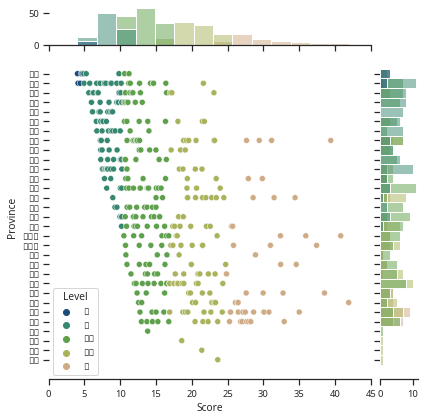

In [106]:
sns.set_theme(
    style="ticks",
    font='Noto Sans',
    font_scale=.85,
    )

g = sns.JointGrid(
    ratio=7,
    space=.25,
    marginal_ticks=True,
    xlim=(0,45),
    x=score,
    y=province,
    palette="gist_earth",
    hue=category,
    data=wqir,
) 
  
sns.despine(trim=False, left=True, bottom=False)
g.plot(sns.scatterplot, sns.histplot)

---

# Combining Data

In this section, I will try to link the data from CGSS2010 and WQIR2018 and compare them across provinces.

In [107]:
# First, swap the the keys and values in the s41_code list above so that I can search for province names below.
s41_rev = {value:key for (key,value) in s41_codes.items()}

Next, I want to add a new column `S41` which is the `s41_code` from above into the WQIR df

***But it's not working...***